# Objective

###  The objective was to develop a model that will maximize profits for direct-mail marketing (id est. a model that would identify customers who will respond to a direct-mail marketing promotion, based on information collected about the customers). 

# Dataset & Data Preprocessing

### For this purpose, I got the clothing data sets that had 119 variables and 2847 instances(customers' information).After exploring, I got the idea that after 51 variables, the other variables are derived from it. Data types of the variables are float64(85), int64(5), object(29+2*).

### HHKEY variables was mentioned as "Customer ID: unique, encrypted customer identification" but it has the same value for each instance(so dropped it). Many ZIP_CODE has only 4 digits, because 0 is in starting, so changing it to 5 changes the variable to string, so from the zip_code, I got the city and state for exploration purpose. 

### There was 228 missing values, as these are very low, so I just dropped them. Statistical summary was also calculated for numeric variables.

### In the below sections, some values are not displayed as output to keep the document readable but separate copy is included along with this to display all the outputs.

* two from zip_code: city and state

In [1]:
#loading libraries and reading data
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 119)
df=pd.read_csv("Ass_data.csv")
df.head(2)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit,Spending_Month_2_3,Spending_Month_4_5_6,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,...,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,flag sweaters,flag knit tops,flag knit dresses,flag blouses,flag jackets,flag career pants,flag casual pants,flag shirts,flag dresses,flag suits,flag outerwear,flag jewelry,flag fashion,flag legwear,flag collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,flagspendAM,flagspendPS,flagspendCC,flagspendAX,flagspendlast3m,flagspendlast1m,flagspendlast6m,flagspendSPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flagspendm4 5 6,flagspendm2 3,City,State
0,9.960000e+12,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.0,0.3,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.0,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.0,0.00,0.0,0.0,0.60,17.0,666.0,333.0,0.08,9.0,1.0,11.0,1.0,7.0,N,0.0,5.0,0.0,0.0,31.81,111.0,10.0,0.00,0.0,368.46,184.23,0.00,0.0,0.430964,5.909332,5.216185,0.424264,...,0.0,0.500000,0.000000,0.43589,0.000000,0.0,0.0,0.0,0.141421,0.173205,0.538516,T,F,F,T,F,T,F,T,F,F,F,F,T,T,T,0.0,0.0,19.195312,0.0,0.00000,0.000000,0.000000,0.0,F,F,T,F,F,F,F,F,5.808142,2.197225,1.0,2.397895,0.0,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F,Agawam,MA
1,9.960000e+12,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.0,0.0,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.0,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.0,55.99,258.0,0.0,0.54,14.0,696.0,174.0,0.33,6.0,0.0,14.0,1.0,7.0,Y,0.0,4.0,2.0,50.0,32.72,43.5,10.0,0.03,1.0,258.00,64.50,82.01,120.0,0.583333,5.552960,4.166665,0.509902,...,0.0,0.424264,0.374166,0.00000,0.424264,0.0,0.0,0.0,0.000000,0.141421,0.608276,T,T,F,F,F,T,T,F,T,F,F,F,F,T,T,0.0,0.0,16.062378,0.0,11.74734,7.482647,16.062378,0.0,F,F,T,F,T,T,T,F,5.159055,1.791759,0.0,2.639057,0.0,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T,East Longmeadow,MA


In [952]:
df.HHKEY.nunique() # unique values of HHKEY variable

1

In [2]:
df.shape # shape of the data

(2847, 121)

In [955]:
df.isna().sum() #run to get na values sum

In [3]:
df1=df.dropna() # dropping nas

In [4]:
df1.shape # now the shape is 2619

(2619, 121)

In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2845
Columns: 121 entries, HHKEY to State
dtypes: float64(85), int64(5), object(31)
memory usage: 2.4+ MB


In [16]:
df1.describe() # statistical summary of the the variables

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit,Spending_Month_2_3,Spending_Month_4_5_6,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,sqrt knit tops,sqrt knit dresses,sqrt blouses,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,sqrt spending months 2 3,sqrt spending months 4 5 6
count,2.619000e+03,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000
mean,9.955602e+12,9215.453608,135.259259,4.817869,481.293303,0.472700,116.154387,12.870561,0.242984,0.030791,0.045307,0.079658,0.140767,0.085131,0.071409,0.066716,0.063371,0.030347,0.013358,0.008175,0.026310,0.011509,0.066344,20.556079,181.180374,259.397064,20.159786,85.795074,30.055769,217.387064,44.070011,0.514014,11.769759,434.136693,177.338778,0.188100,6.739977,0.787323,16.814433,2.172203,2288.875907,0.043910,4.634212,1.176785,17.032638,39.774532,85.217999,14.819779,0.099537,0.148148,481.293303,116.156869,55.739305,131.591989,0.397338,5.636616,4.546677,0.398488,0.095042,0.102201,0.189997,0.254489,0.176669,0.156406,0.155198,0.126764,0.050679,0.025728,0.030774,0.076888,0.042761,0.112771,0.855342,7.768607,13.552300,1.315441,5.461594,2.202609,10.743305,3.053722,4.837540,1.613420,0.469802,2.226543,0.618499,3.966812,3.446061,0.687619,4.045182,7.491732
std,4.073887e+06,6230.324416,107.485972,5.998030,806.238510,0.499349,85.839548,2.569219,0.252854,0.073587,0.121006,0.122611,0.188982,0.147473,0.136514,0.120224,0.150577,0.124427,0.080344,0.040396,0.080933,0.045991,0.170330,173.767780,555.036032,436.528676,95.874379,183.459696,91.697591,358.720495,123.064833,0.166354,7.034026,193.385038,147.504518,0.131061,5.231170,1.753806,27.633237,1.372453,1741.944275,0.204934,3.531565,1.823071,24.602839,28.740961,83.662376,11.697762,0.358818,0.355315,806.238510,85.839107,125.231611,232.805840,0.264962,0.982216,0.646145,0.290212,0.147535,0.186750,0.208748,0.275738,0.232248,0.216712,0.206509,0.217531,0.166702,0.112698,0.085032,0.142850,0.098410,0.231620,4.453318,10.994329,8.704089,4.293768,7.482476,5.021345,10.099872,5.895597,0.866739,0.795622,0.752879,1.051848,0.544859,1.038231,0.706712,0.839187,6.276213,8.688772
min,9.955600e+12,1001.

In [20]:
df1.ZIP_CODE.value_counts()

10314    19
6488     16
10312    14
7728     13
6410     13
         ..
14502     1
8353      1
14482     1
2188      1
4096      1
Name: ZIP_CODE, Length: 1138, dtype: int64

In [4]:
df2=df1.copy()

## Exploratory Data Analysis

### From ZIP_CODE, I got city and state, as the data was from New England*, the distribution of customers along different states was explored by map using Folium library. We can see in the map that the customers are from different states like Indiana, North Carolina, Massachusetts, New Jersey and Arizona.

*New England is a region comprising six states in the northeastern United States: Maine, Vermont, New Hampshire, Massachusetts, Rhode Island, and Connecticut.

In [5]:
import requests
import json
url="https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
us_states = f'{url}/us-states.json'
data = json.loads(requests.get(us_states).text)

In [6]:
import requests
import json
dp=pd.read_csv("aq.csv")
dp.to_json("al.json")

In [7]:
import numpy as np 
import pandas as pd 
import folium
#url = 'https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json'
world_geo = r'cm.json'
m = folium.Map(location=[43,-100], zoom_start=4)
folium.Choropleth(geo_data=data, data=df2,
                  columns=['State', 'REC'],
                  key_on='feature.id',
                  fill_color='BrBG',
                  fill_opacity=0.9,
                  line_opacity=0.3,
                  nan_fill_color='#ffffff00',                  
                  legend_name='Purchase by State').add_to(m)  
folium.LayerControl().add_to(m)
m

### As my objective was to explore customers' response of direct mail marketing exploration. So the variable of interest is "RESP", it's distribution can be seens in below doughnut chart, i.e., only 14.8 responded whereas 85.2 didn't.

### After this I divided the data into categorical and numeric. For categorical variables, I plotted below bar charts to explore the data further. The variables that had more than 2000 counts of yes/no; I again plotted bar chart in reference to variable "RESP". Here, we can see that flag Markdown percentage on customer purchases, "FlagMarkdown", Valid phone number "VALPHON", flag of returns variables have more responded customers in count.

In [192]:
sums = df2.RESP.groupby(df2.RESP).count()
sums

RESP
0.0    2231
1.0     388
Name: RESP, dtype: int64

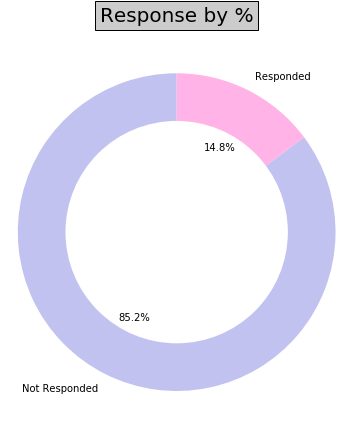

In [190]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Not Responded','Responded']
#colors
colors = ['#c2c2f0','#ffb3e6']
fig1, ax1 = plt.subplots(figsize=(5,6))
ax1.pie(sums, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Response by %", bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
plt.show()

In [ ]:
df4=df2.Columns()

### Numeric variables and categorical variables

In [342]:
num_cols = df2._get_numeric_data().columns
num_cols

Index(['HHKEY', 'ZIP_CODE', 'REC', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'STORELOY', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP', 'Tot_Spend', 'Sales per Visit', 'Spending_Month_2_3', 'Spending_Month_4_5_6', 'bc purchase visits', 'ln total net sales', 'ln_ave spending per visit', 'sqrt sweaters', 'sqrt knit tops', 'sqrt knit dresses', 'sqrt blouses', 'sqrt jackets', 'sqrt career pants', 'sqrt casual pants', 'sqrt shirts', 'sqrt dresses', 'sqrt suits', 'sqrt outerwear', 'sqrt jewelry', 'sqrt fashion', 'sqrt legwear', 'sqrt collectibles', 'sqrt spending AM',
       's

In [7]:
cat=df2.select_dtypes(include=['object'])
cat.shape
cat.columns

Index(['VALPHON', 'flag sweaters', 'flag knit tops', 'flag knit dresses', 'flag blouses', 'flag jackets', 'flag career pants', 'flag casual pants', 'flag shirts', 'flag dresses', 'flag suits', 'flag outerwear', 'flag jewelry', 'flag fashion', 'flag legwear', 'flag collectibles', 'flagspendAM', 'flagspendPS', 'flagspendCC', 'flagspendAX', 'flagspendlast3m', 'flagspendlast1m', 'flagspendlast6m', 'flagspendSPLY', 'flag returns', 'flag response rate', 'flag markdown', 'flagspendm4 5 6', 'flagspendm2 3', 'City', 'State'], dtype='object')

In [8]:
num=df2.select_dtypes(include=['integer', 'float'])
num.shape

(2619, 90)

In [54]:
cat_2=cat.drop(["City", "State", "VALPHON", "flag returns","flag response rate", "flag markdown","flag returns",
                "flag response rate", "flag markdown", "flagspendm4 5 6","flagspendm2 3"], axis=1)

### Bar Graph

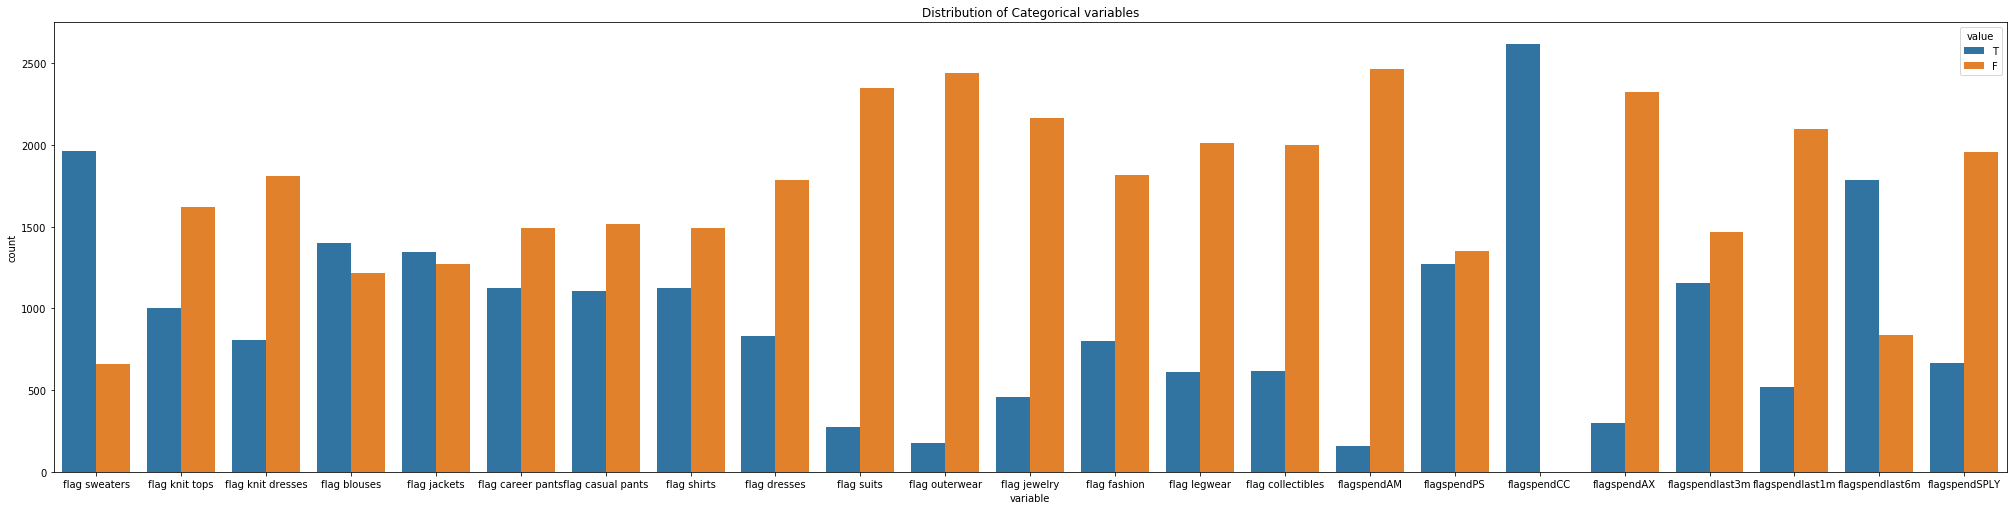

In [56]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 35,8.27
sns.countplot(x="variable", hue="value", data=pd.melt(cat_2))
plt.title("Distribution of Categorical variables")
plt.show()

In [67]:
cat_3=cat[["flag returns","flag response rate", "flag markdown","flag returns",
                "flag response rate", "flag markdown", "flagspendm4 5 6","flagspendm2 3"]]


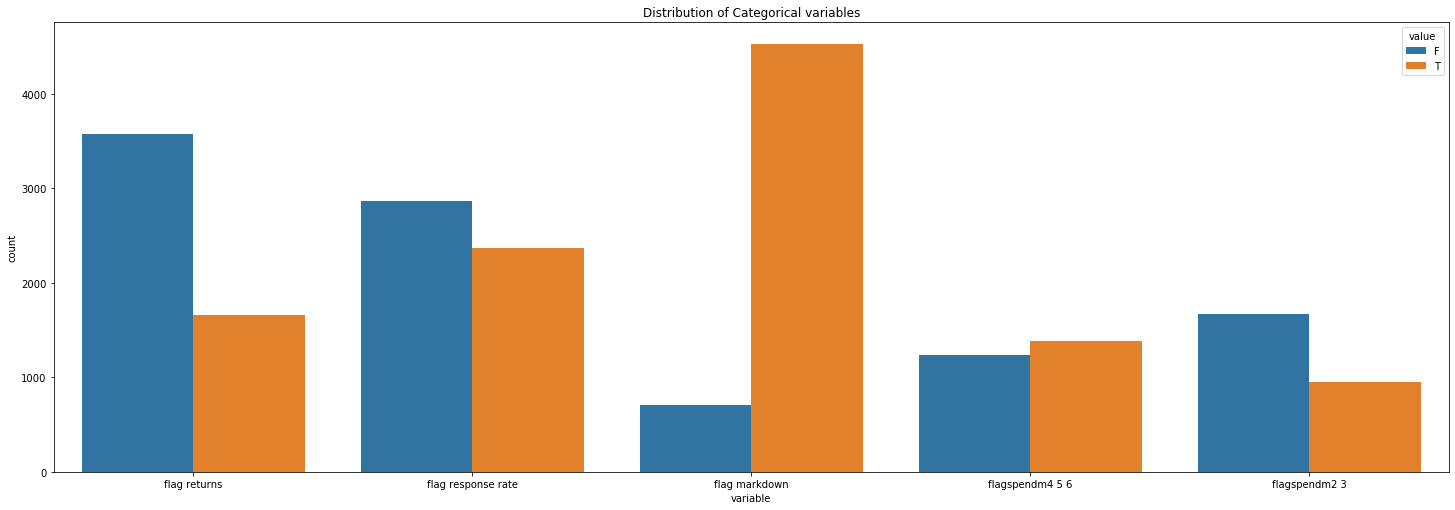

In [68]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 25,8.27
sns.countplot(x="variable", hue="value", data=pd.melt(cat_3))
plt.title("Distribution of Categorical variables")
plt.show()

Text(0.5, 0.98, 'Frequency Distribution of Different Categorical Variable wrt RESP')

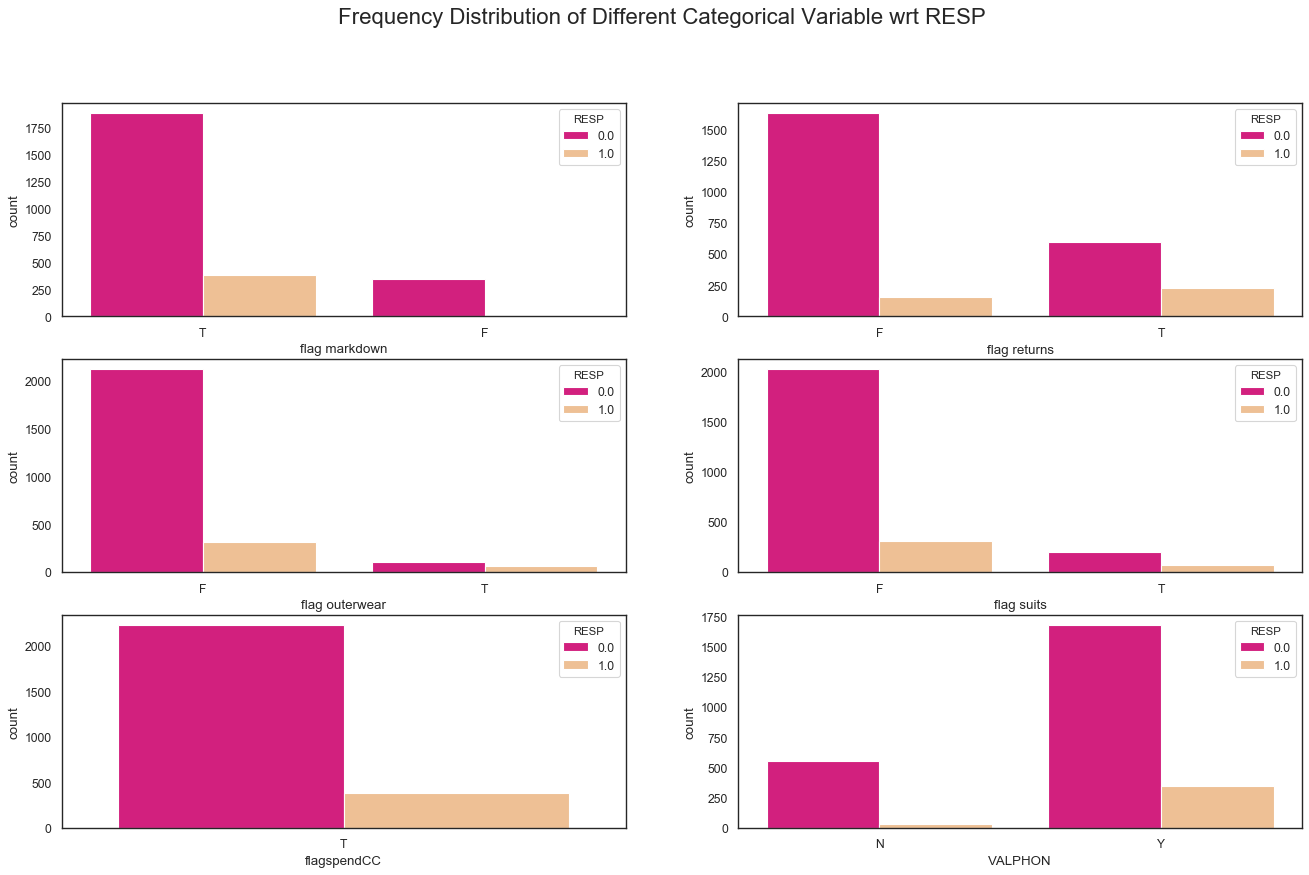

In [73]:
import itertools
fig, axarr = plt.subplots(3, 2, figsize=(20,12), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='flag markdown', hue = 'RESP',data = df2, ax=axarr[0][0], palette="Accent_r")
axarr[0][0]
sns.countplot(x='flag returns', hue = 'RESP',data = df2, ax=axarr[0][1], palette="Accent_r")
axarr[0][1]
sns.countplot(x='flag outerwear', hue = 'RESP',data = df2, ax=axarr[1][0], palette="Accent_r")
axarr[1][0]
sns.countplot(x='flag suits', hue = 'RESP',data = df2, ax=axarr[1][1], palette="Accent_r")
axarr[1][1]
sns.countplot(x='flagspendCC', hue = 'RESP',data = df2, ax=axarr[2][0], palette="Accent_r")
axarr[2][0]
sns.countplot(x='VALPHON', hue='RESP', data=df2, ax=axarr[2][1], palette="Accent_r")
axarr[2][1]
fig.suptitle('Frequency Distribution of Different Categorical Variable wrt RESP', fontsize=20)

### I also explored sweetviz library of Python: this shows the distribution of all the variables and report in html. That report is also attached in the last.

In [210]:
import sweetviz as sv

my_report2 = sv.analyze(df2)
my_report2.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [221]:
import sys
print(sys.getrecursionlimit())

3000


### Histogram Plot

### Histogram plot of all numeric variables has been plotted below. After looking at the variables, we can see that dataset contains few variables along with their square roots and natural logs such as PSWEATER/sqrt sweaters. MON/ln total. It seems like the original data is used to derive some variables and the present data is obtained. Possibly derivation might be an effort to normalize the variables. However, since the intention about providing original variables along with derived variables is not known so no variable is removed from analysis on this basis. Moreover, derivation comes with certain limitations such as the negative values in original variables have missing corresponding values in their square root transformation. Similar limitations can be seen for log transformed variables. 

c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


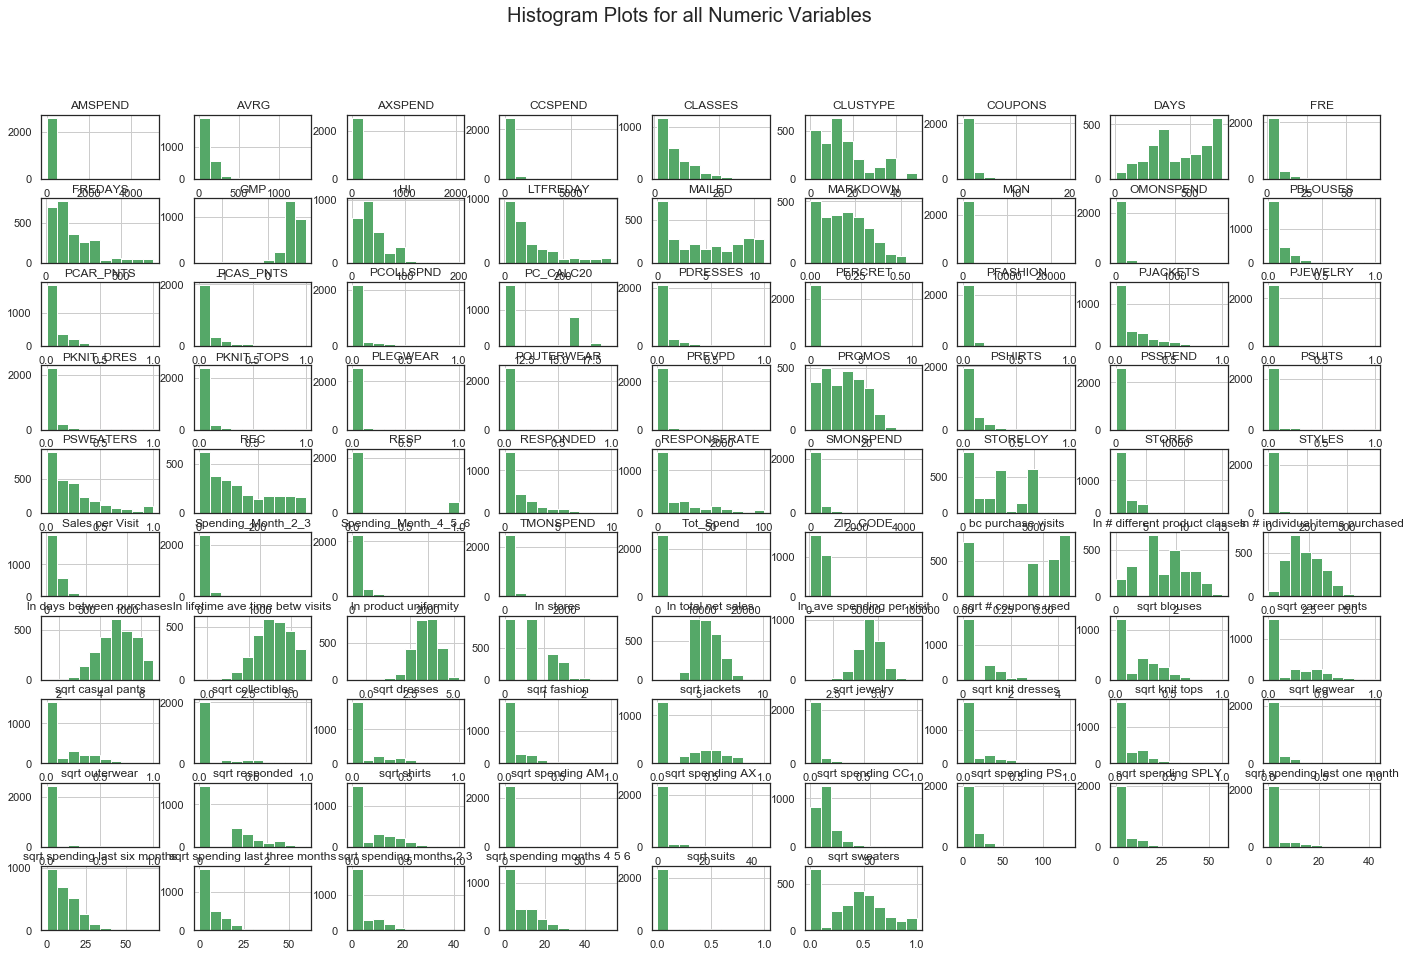

In [348]:
fig = plt.figure(figsize = (24,15))
ax = fig.gca()
num1.hist(ax=ax, color='g')

fig.suptitle("Histogram Plots for all Numeric Variables", fontsize=20)
plt.show();

In [300]:
asssk=pd.DataFrame(cm)
asssk.to_csv("g.csv")

### HeatMap

### Here is the heatmap of correlation for numeric variables, for the representation purpose I used only 30 variables with higher correlation. The data is highly correlated as so many variables are derived from the other variables as stated below. Also with Variance Inflation factor, we can see the values are extremely correlated. Instead of manually selecting the variables using VIF, I am using penalized method to accomplish the job.

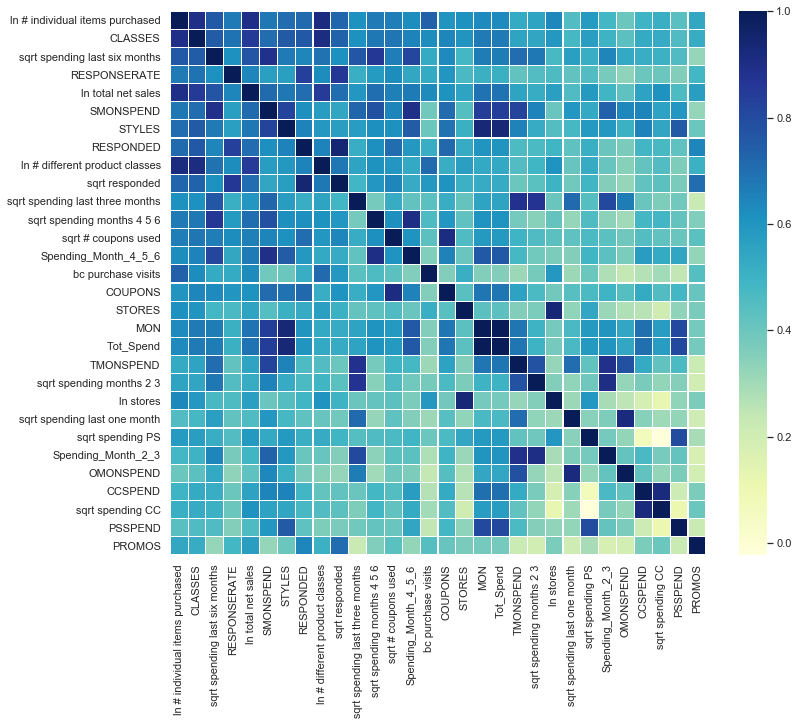

In [296]:
k = 30
  
cols = corr.nlargest(k, 'RESP')['RESP'].index 
  
cm = np.corrcoef(df2[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

In [9]:
num1=num.drop(["ZIP_CODE","HHKEY"], axis=1)
num1.shape

(2619, 88)

### here is the snapshopt, all the values are attached after conclusion to keep the file readable 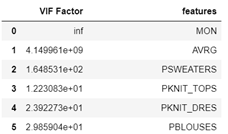

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(num1.values, i) for i in range(num1.shape[1])]
vif["features"] = num1.columns
vif #run this to get VIF for all numeric variables

c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### OUTLIER DETECTION

### For outlier detection, I used box plot and here we can see that some variables have ouliers. For example, variable "MON", "PJEWELLERY", "AMSSPEND" etc. 

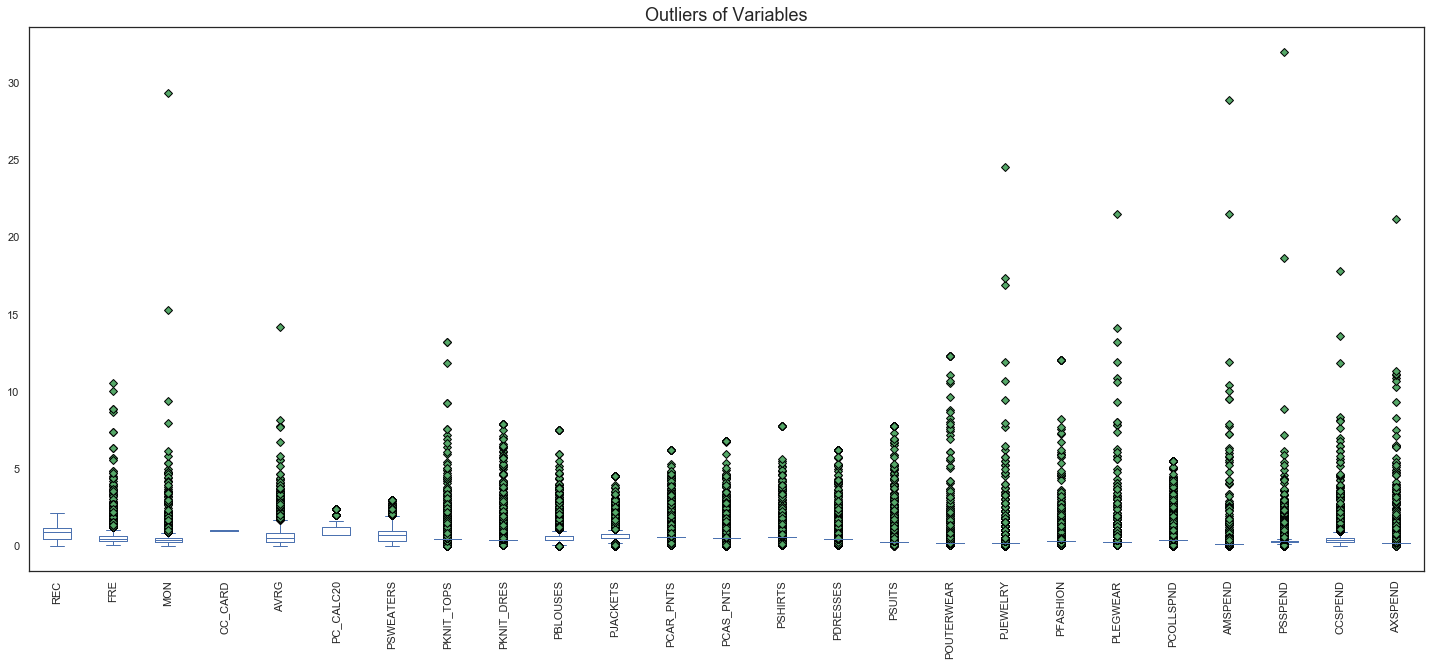

In [733]:
import numpy as np
num2=num1.iloc[:,0:25]
column_mean = num2. mean()
column_std=num2.std()
normalized_df = np.abs((num2-column_mean) / (column_std))
normalized_df.head(5)
green_diamond = dict(markerfacecolor='g', marker='D')
boxplot2 = normalized_df.boxplot(figsize=(25,10), grid=False, flierprops=green_diamond, color='blue')
plt.xticks(rotation=90) 
plt.title('Outliers of Variables', fontsize=18);

In [105]:
cat.columns

Index(['VALPHON', 'flag sweaters', 'flag knit tops', 'flag knit dresses', 'flag blouses', 'flag jackets', 'flag career pants', 'flag casual pants', 'flag shirts', 'flag dresses', 'flag suits', 'flag outerwear', 'flag jewelry', 'flag fashion', 'flag legwear', 'flag collectibles', 'flagspendAM', 'flagspendPS', 'flagspendCC', 'flagspendAX', 'flagspendlast3m', 'flagspendlast1m', 'flagspendlast6m', 'flagspendSPLY', 'flag returns', 'flag response rate', 'flag markdown', 'flagspendm4 5 6', 'flagspendm2 3', 'City', 'State'], dtype='object')

In [10]:
catt=cat.drop(["State", "City"], axis=1)

### Here I changed the categorical variables into dummy variables and created the data.

In [11]:
catt1=pd.get_dummies(catt, drop_first = True)

In [12]:
num1.head()

,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit,Spending_Month_2_3,Spending_Month_4_5_6,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,sqrt knit tops,sqrt knit dresses,sqrt blouses,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,sqrt spending months 2 3,sqrt spending months 4 5 6
0,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17.0,666.0,333.00,0.08,9.0,1.0,11.0,1.0,7.0,0.0,5.0,0.0,0.00,31.81,111.00,10.0,0.00,0.0,368.46,184.2300,0.00,0.00,0.430964,5.909332,5.216185,0.424264,0.000000,0.000000,0.547723,0.000000,0.500000,0.000000,0.435890,0.000000,0.0,0.0,0.000000,0.141421,0.173205,0.538516,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,5.808142,2.197225,1.000000,2.397895,0.0,4.709530,3.459781,0.000000,0.000000,0.000000
1,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14.0,696.0,174.00,0.33,6.0,0.0,14.0,1.0,7.0,0.0,4.0,2.0,50.00,32.72,43.50,10.0,0.03,1.0,258.00,64.5000,82.01,120.00,0.583333,5.552960,4.166665,0.509902,0.400000,0.000000,0.000000,0.000000,0.424264,0.374166,0.000000,0.424264,0.0,0.0,0.000000,0.000000,0.141421,0.608276,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,5.159055,1.791759,0.000000,2.639057,0.0,3.772761,3.487987,1.414214,9.055937,10.954451
2,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10.0,343.0,171.50,0.11,1.0,0.0,2.0,1.0,7.0,0.0,4.0,0.0,0.00,100.00,68.60,16.0,0.00,0.0,77.00,38.5000,0.00,0.00,0.430964,4.343805,3.650658,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,5.144583,0.000000,0.000000,0.693147,0.0,4.228293,4.605170,0.000000,0.000000,0.000000
3,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24.0,701.0,87.62,0.29,15.0,3.0,35.0,1.0,7.0,0.0,9.0,6.0,66.67,23.27,26.96,10.0,0.00,0.0,846.06,105.7575,104.94,268.93,0.637204,6.740590,4.661078,0.616441,0.000000,0.223607,0.244949,0.447214,0.412311,0.000000,0.223607,0.000000,0.0,0.0,0.072849,0.173205,0.100000,0.000000,0.0,0.0,29.087111,0.0,10.244023,0.000000,19.335718,12.893797,4.473009,2.708050,1.732051,3.555348,0.0,3.294354,3.147165,2.449490,10.244023,16.399085
4,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0.0,49.0,49.00,0.42,4.0,0.0,8.0,1.0,7.0,0.0,0.0,0.0,0.00,28.52,24.50,20.0,0.00,0.0,87.44,87.4400,87.44,0.00,0.000000,4.470953,4.470953,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.640312,0.000000,0.000000,0.0,0.0,0.412311,0.000000,0.000000,0.000000,0.0,0.0,9.350936,0.0,9.350936,0.000000,9.350936,0.000000,3.891820,1.386294,0.000000,2.079442,0.0,3.198673,3.350606,0.000000,9.350936,0.000000


In [112]:
catt1.head(2)

,VALPHON_Y,flag sweaters_T,flag knit tops_T,flag knit dresses_T,flag blouses_T,flag jackets_T,flag career pants_T,flag casual pants_T,flag shirts_T,flag dresses_T,flag suits_T,flag outerwear_T,flag jewelry_T,flag fashion_T,flag legwear_T,flag collectibles_T,flagspendAM_T,flagspendPS_T,flagspendAX_T,flagspendlast3m_T,flagspendlast1m_T,flagspendlast6m_T,flagspendSPLY_T,flag returns_T,flag response rate_T,flag markdown_T,flagspendm4 5 6_T,flagspendm2 3_T
0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1


In [115]:
data=num1.join(catt1)
data.shape
data.head(2)

,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit,Spending_Month_2_3,Spending_Month_4_5_6,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,sqrt knit tops,sqrt knit dresses,sqrt blouses,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,sqrt spending months 2 3,sqrt spending months 4 5 6,VALPHON_Y,flag sweaters_T,flag knit tops_T,flag knit dresses_T,flag blouses_T,flag jackets_T,flag career pants_T,flag casual pants_T,flag shirts_T,flag dresses_T,flag suits_T,flag outerwear_T,flag jewelry_T,flag fashion_T,flag legwear_T,flag collectibles_T,flagspendAM_T,flagspendPS_T,flagspendAX_T,flagspendlast3m_T,flagspendlast1m_T,flagspendlast6m_T,flagspendSPLY_T,flag returns_T,flag response rate_T,flag markdown_T,flagspendm4 5 6_T,flagspendm2 3_T
0,208,2,368.46,0,184.23,11,0.18,0.00,0.0,0.3,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.0,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.0,0.00,0.0,0.0,0.60,17.0,666.0,333.0,0.08,9.0,1.0,11.0,1.0,7.0,0.0,5.0,0.0,0.0,31.81,111.0,10.0,0.00,0.0,368.46,184.23,0.00,0.0,0.430964,5.909332,5.216185,0.424264,0.0,0.0,0.547723,0.0,0.500000,0.000000,0.43589,0.000000,0.0,0.0,0.0,0.141421,0.173205,0.538516,0.0,0.0,19.195312,0.0,0.00000,0.000000,0.000000,0.0,5.808142,2.197225,1.0,2.397895,0.0,4.709530,3.459781,0.000000,0.000000,0.000000,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,6,4,258.00,1,64.50,11,0.26,0.16,0.0,0.0,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.0,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.0,55.99,258.0,0.0,0.54,14.0,696.0,174.0,0.33,6.0,0.0,14.0,1.0,7.0,0.0,4.0,2.0,50.0,32.72,43.5,10.0,0.03,1.0,258.00,64.50,82.01,120.0,0.583333,5.552960,4.166665,0.509902,0.4,0.0,0.000000,0.0,0.424264,0.374166,0.00000,0.424264,0.0,0.0,0.0,0.000000,0.141421,0.608276,0.0,0.0,16.062378,0.0,11.74734,7.482647,16.062378,0.0,5.159055,1.791759,0.0,2.639057,0.0,3.772761,3.487987,1.414214,9.055937,10.954451,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1


# Data Analysis

### For the analysis purpose, as our objective is to identify customers that respond to direct mail marketing, so the variable RESP: response to promotion is taken as target variable(y). I divided the variables into X and y and then splitted the data into train and test. For standardizing, X_train and X_test I used MinMaxScaler. As there are many dichotomous categorical variables, so keeping in mind that I choose MinMaxscaler.

In [52]:
data.to_csv("data.csv")

In [1041]:
data1=data.drop(["RESP"], axis=1)
data1.shape
data2=data[["RESP"]]
from sklearn.model_selection import train_test_split
X=data1.values[:,0:]
y=data2.values

In [367]:
print(len(X))
print(len(y))

2619
2619


In [1042]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=1/3, random_state=0)

In [1043]:
from sklearn.preprocessing import MinMaxScaler
c=MinMaxScaler()
X_train=np.array(c.fit_transform(X_train))
X_test=np.array(c.fit_transform(X_test))

## LOGISTIC REGRESSION 

### As the dataset has multicollinearity, I choose three variable selection methods i.e., Lasso, Ridge and ElasticNet. Python has a library sklearn from which we can use LogisticRegressionCV. In this we can not only do crossvalidation for hyper parameters but also do logistic regression for classification. For penality option, I used  lasso in first analysis, then ridge and then elastic net. Cross validation has been done to optimize the hyperparameters.

### LASSO:

### I used different alphas from 0.01 to 9.51 and used cross validation method to come up with the best alpha parameter, I found 1.51 as the best estimate for the hyperparameter alpha using this for penalized logistic regression I came up with 53 nonzero coefficients. Using this model and applying into the test set I got specificity, Precision, Recall(Sensitivity), accuracy as 0.98,  0.78, 0.44 and 0.87 respectively. The mse of the model is 0.21.

In [1044]:
from sklearn.linear_model import LogisticRegressionCV
alphas = np.arange(0.01, 10, 0.5)
log = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=alphas)
log.fit(X_train, y_train)


c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=array([0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51, 4.01, 4.51, 5.01,
       5.51, 6.01, 6.51, 7.01, 7.51, 8.01, 8.51, 9.01, 9.51]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l1',
                     random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [1058]:
log.C_

array([1.51])

In [1052]:
print(np.count_nonzero(log.coef_))

54


In [379]:
k=log.coef_.ravel()
k.shape
col=data1.columns
col

Index(['REC', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
       ...
       'flagspendAX_T', 'flagspendlast3m_T', 'flagspendlast1m_T', 'flagspendlast6m_T', 'flagspendSPLY_T', 'flag returns_T', 'flag response rate_T', 'flag markdown_T', 'flagspendm4 5 6_T', 'flagspendm2 3_T'], dtype='object', length=115)

In [384]:
g=pd.DataFrame(col, k)
g.to_csv("an.csv") # outputting the dataset to have a look

In [386]:
g=pd.read_csv("an.csv")

### From the below plot, we can see that for the best penality parameter, the estimates of the coefficient on the y axis and their name in the x axis this gives a snapshot that which features are shrinked to 0. The variable "ln days between purchases", FRE, sqrt blouses are more positivly correlated with RESP as they have higher estimates than others. Also, "ln lifetime ave in between visits" has lowest coefficient value from others showing its inverse relation with RESP.

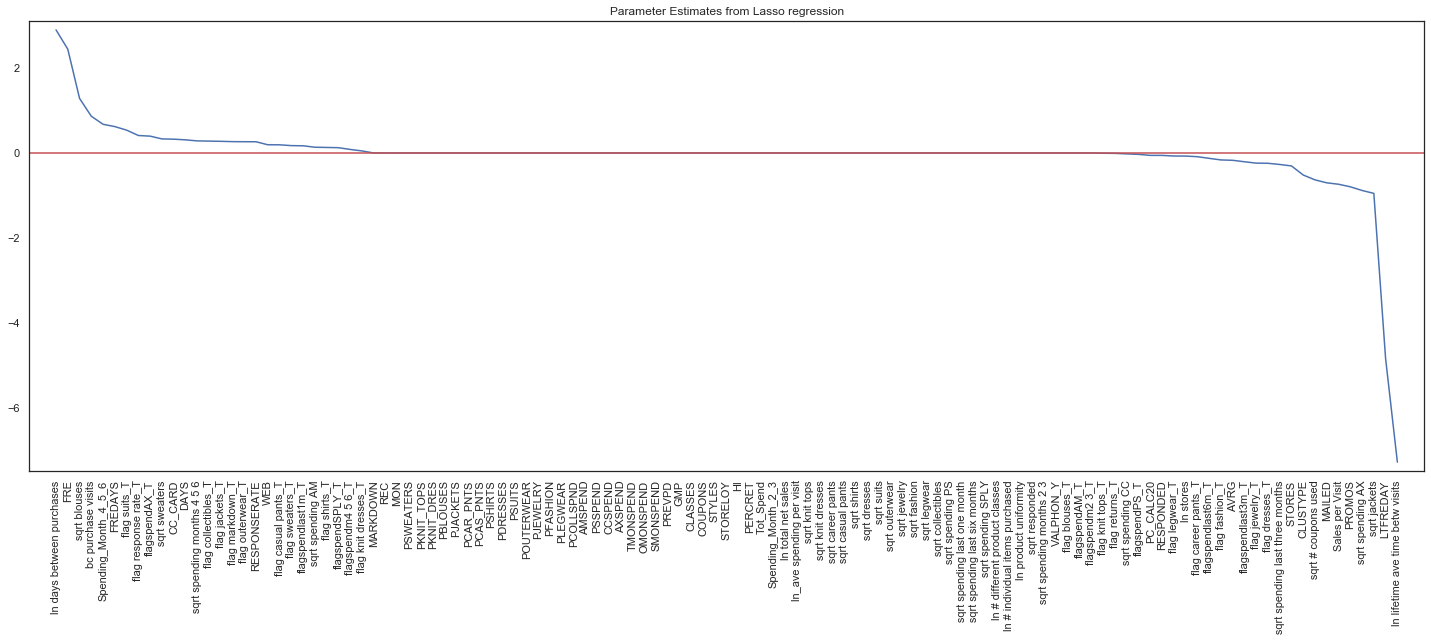

In [388]:
plt.plot(g.feature, g.coef)
plt.xticks(range(len(g.feature)), g.feature, rotation=90) 
plt.margins(0.02)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Parameter Estimates from Lasso regression")
plt.show()

In [389]:
log.Cs_

array([0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51, 4.01, 4.51, 5.01,
       5.51, 6.01, 6.51, 7.01, 7.51, 8.01, 8.51, 9.01, 9.51])

In [506]:
las_est=log.predict(X_test)

In [507]:
from sklearn.metrics import confusion_matrix
las_est=log.predict(X_test)
cm_LR=confusion_matrix(y_test, las_est)
cm_LR

array([[725,  16],
       [ 74,  58]], dtype=int64)

In [519]:
accuracy=(725+58)/(725+85+16+74)
tn, fp, fn, tp = confusion_matrix(y_test, las_est).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Logistic with lasso regression, specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)

Logistic with lasso regression, specificity, Precision, Recall(Sensitivity), accuracy are 0.9784075573549258 0.7837837837837838 0.4393939393939394 0.87


In [735]:
mean_squared_error = np.mean((las_est - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

Mean Squared Error on test set 0.21033447093602264


In [ ]:
*****************************************************************************************************************************

### RIDGE: 

### Similarly, I used different alphas from 0.01 to 9.51 and used cross validation method to come up with the best alpha parameter, I found 2.51 as the best estimate for the hyperparameter alpha, using this for penalized logistic regression I came up with 115 nonzero coefficients as ridge reduces the estimates and doesn't shrink it to 0. This is how the impact of not important variables on target variable reduces. Using this model and applying into the test set I got specificity, Precision, Recall(Sensitivity), accuracy as 0.97, 0.60, 0.28, 0.86 respectively. The mse of the model is 0.2.

In [509]:
from sklearn.linear_model import LogisticRegressionCV
alphas = np.arange(0.01, 10, 0.5)
log2 = LogisticRegressionCV(penalty='l2', solver='liblinear', Cs=alphas)
log2.fit(X_train, y_train)

c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=array([0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51, 4.01, 4.51, 5.01,
       5.51, 6.01, 6.51, 7.01, 7.51, 8.01, 8.51, 9.01, 9.51]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [510]:
print(np.count_nonzero(log2.coef_))

115


In [1060]:
log2.C_

array([2.51])

In [511]:
k2=log2.coef_.ravel()
k2.shape

(115,)

In [512]:
g2=pd.DataFrame(col, k2)
g2.to_csv("an2.csv")

In [514]:
g2=pd.read_csv("an2.csv")

### From the below plot, we can see that for the best penality parameter, the estimates of the coefficient on the y axis and their name on the x axis, this gives a snapshot that which features are shrinked towards 0. Similar to the lasso, the variables "ln days between purchases", FRE, FREDAYS, "sqrt blouses" are more positivly correlated with RESP as they have higher estimates than others. Also, "ln lifetime ave in between visits" has lowest coefficient value from others showing its inverse relation with RESP.  Same result of variables are obtained as in the lasso one.

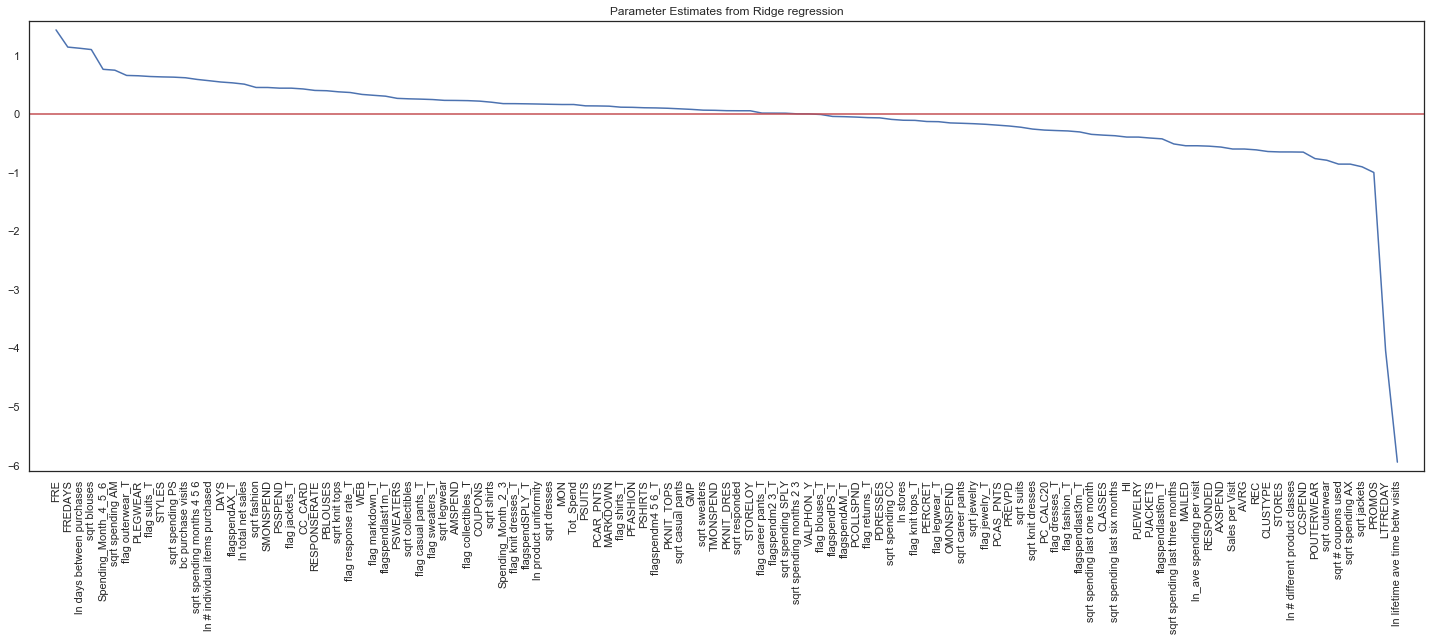

In [559]:
plt.plot(g2.feature, g2.coef)
plt.xticks(range(len(g2.feature)), g2.feature, rotation=90) 
plt.margins(0.02)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Parameter Estimates from Ridge regression")
plt.show()

In [516]:
from sklearn.metrics import confusion_matrix
ridge_est=log2.predict(X_test)
cm_LR2=confusion_matrix(y_test, ridge_est)
cm_LR2

array([[717,  24],
       [ 95,  37]], dtype=int64)

In [520]:
accuracy=(717+37)/(717+37+95+24)
tn, fp, fn, tp = confusion_matrix(y_test, ridge_est).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Logistic with ridge regression, specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)

Logistic with ridge regression, specificity, Precision, Recall(Sensitivity), accuracy are 0.9676113360323887 0.6065573770491803 0.2803030303030303 0.86368843069874


In [734]:
mean_squared_error = np.mean((ridge_est - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

Mean Squared Error on test set 0.19994646575579725


In [ ]:
***********************************************************************************************************************

### ELASTIC NET:
 ### Similar to lasso and ridge, I used range of values for l1_ratios i.e., from 0.3 to 1 and used cross validation method to come up with the best l1_ratio, I found 0.36 as the best estimate for penality, using this for penalized logistic regression I came up with 39 nonzero coefficients, hence elasticnet shrinked more variables to 0 than lasso and ridge. Using this model and applying into the test set I got specificity, Precision, Recall(Sensitivity), accuracy as  0.99, 0.72, 0.16, 0.85 respectively. The mse of the model is 0.17.

In [555]:
from sklearn.linear_model import LogisticRegression
alpha_range = [0.3, 0.5, 0.7, 0.9, 1]
log3 = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=alpha_range, max_iter=6000)
log3.fit(X_train, y_train)

c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=[0.3, 0.5, 0.7, 0.9, 1], max_iter=6000,
                     multi_class='auto', n_jobs=None, penalty='elasticnet',
                     random_state=None, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [1062]:
log3.C_

array([0.35938137])

In [1061]:
log3.coef_ #Please run this code to get the list of the coefficients

In [557]:
print(np.count_nonzero(log3.coef_))

39


In [558]:
k3=log3.coef_.ravel()
print(k3.shape)
g3=pd.DataFrame(col, k3)
g3.to_csv("an3.csv")

(115,)


In [562]:
g3=pd.read_csv("an3.csv")

### From the below plot, we can see that for the best l1_ratio, the estimates of the coefficient on the y axis and their name on the x axis, this gives a snapshot that which features are shrinked to 0. The variables "DAYS",RESPONSERATE, "bc purchase visits", "sqrt blouses" are more positively correlated with RESP as they have higher estimates than others. Also, "ln lifetime ave in between visits" has lowest coefficient value from others showing its inverse relation with RESP.  

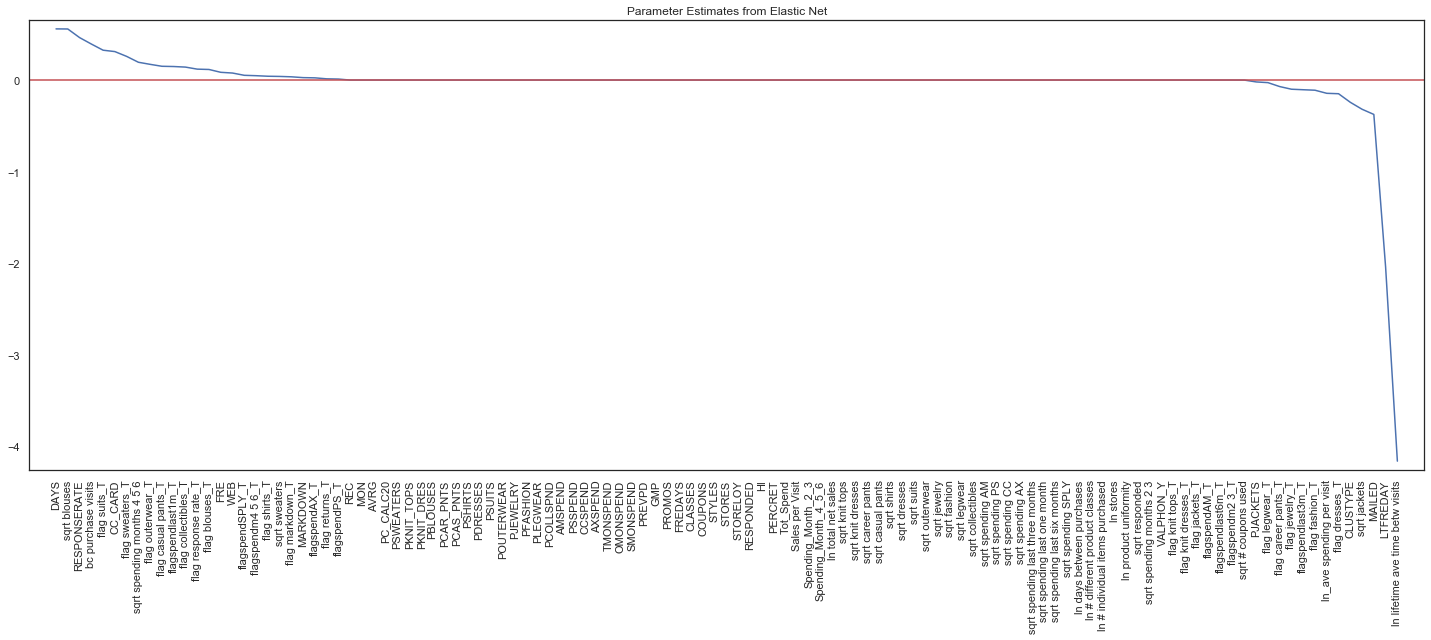

In [563]:
plt.plot(g3.feature, g3.coef)
plt.xticks(range(len(g3.feature)), g3.feature, rotation=90) 
plt.margins(0.02)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Parameter Estimates from Elastic Net")
plt.show()

In [564]:
from sklearn.metrics import confusion_matrix
net_est=log3.predict(X_test)
cm_LR3=confusion_matrix(y_test, net_est)
cm_LR3

array([[733,   8],
       [111,  21]], dtype=int64)

In [566]:
accuracy=(733+21)/(733+21+111+21)
tn, fp, fn, tp = confusion_matrix(y_test, net_est).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Logistic with elastic-net regression, specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)

Logistic with elastic-net regression, specificity, Precision, Recall(Sensitivity), accuracy are 0.9892037786774629 0.7241379310344828 0.1590909090909091 0.8510158013544018


In [736]:
mean_squared_error = np.mean((net_est - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

Mean Squared Error on test set 0.17437599146601165


In [601]:
gk=[log, log2, log3]

### CONFUSION MATRIX

#### The following confusion matrices are used to provide the accuracy, specificity, sensitivity and precision. 

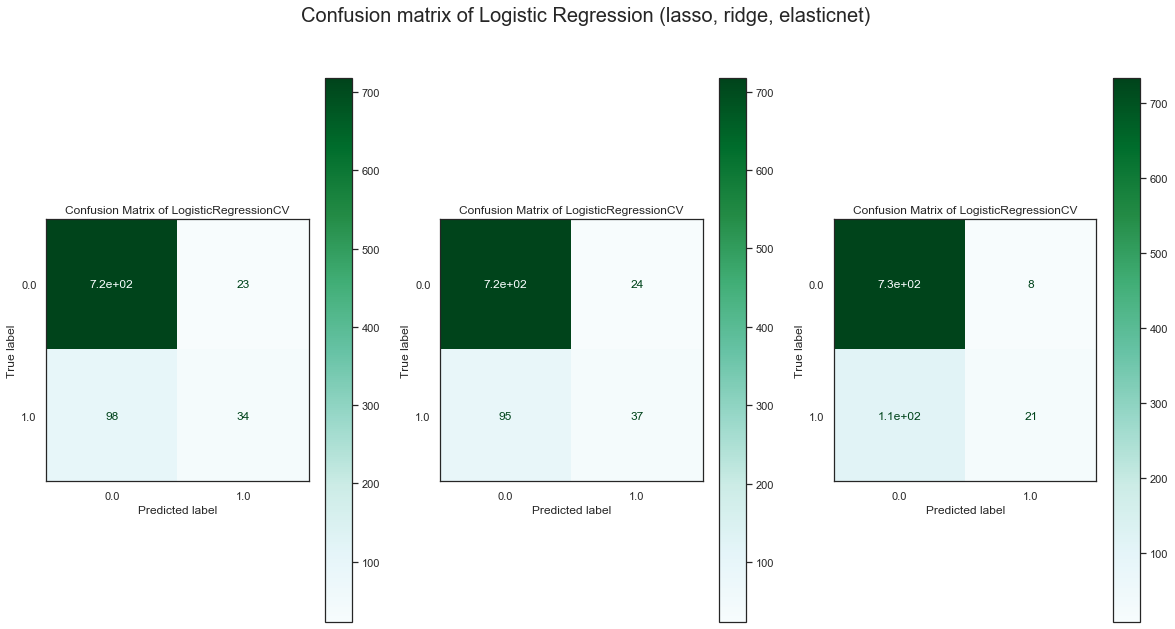

In [621]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
for c, ax in zip(gk, axes.flatten()):
        plot_confusion_matrix(c, X_test, y_test, ax=ax,cmap='BuGn')
        ax.title.set_text("Confusion Matrix of "+type(c).__name__)# doctest: +SKIP 
plt.suptitle("Confusion matrix of Logistic Regression (lasso, ridge, elasticnet)", fontsize=20)
plt.show()  # doctest: +SKIP
    


In [628]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, net_est)

In [717]:
a=print("lasso")
b=print("ridge")
c=print("elasticnet")

lasso
ridge
elasticnet


In [718]:
mn=[a,b,c]

### ROC CURVE COMPARISON

### Below is the comparison of the ROC plot obtained from three different penalized regression, i.e., lasso(red), ridge(green) and elastic net(blue). The results are comparable and AUC of all are around 0.85.

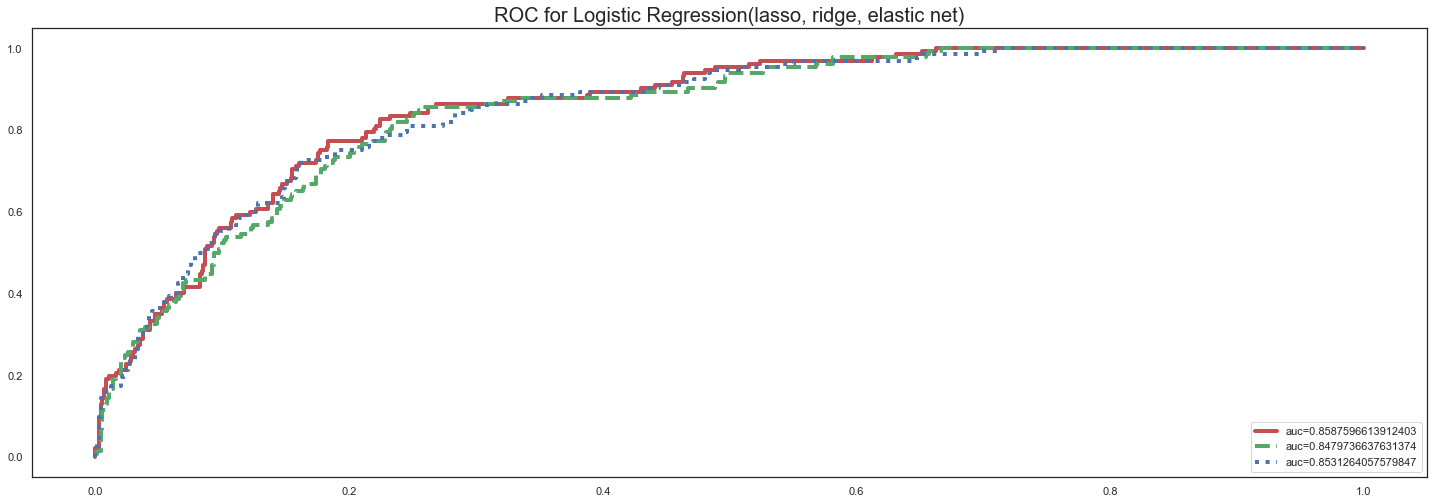

In [724]:
import matplotlib.patches as mpatches
from cycler import cycler
for c, ax in zip(gk, axes.flatten()):
    y_pred_proba = c.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    linestyle_cycler = (cycler('linestyle',['-','--',':'])+cycler(color=['r', 'g', 'b']))
    plt.rc('lines', linewidth=4)
    plt.rc('axes', prop_cycle=linestyle_cycler)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    
    plt.legend(loc=4)
    
    


plt.title("ROC for Logistic Regression(lasso, ridge, elastic net)", fontsize=20)
plt.show()

In [755]:
data_n=data.drop(["Tot_Spend"], axis=1)
data_n.shape
data_m=data[["Tot_Spend"]]


In [1027]:
from sklearn.model_selection import train_test_split
X=data_n.values[:,0:]
y=data_m.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=1/3, random_state=5)

In [1028]:
from sklearn.preprocessing import MinMaxScaler
c=MinMaxScaler()
X_train=np.array(c.fit_transform(X_train))
X_test=np.array(c.fit_transform(X_test))

### Conclusion from Logistics Regression

### The logistic regression is used for the classification with cross validation, and penalized parameters is used to do the variable selection. Elastic Net is performing the best, as it reduced 80 variables to 0, has lowest MSE and highest accuracy. "ln lifetime average time between visits" variable in all the analysis found inversely related with RESP which suggests that when the lifetime average is smaller the chance of Responding is high. However in the elastic net,  "DAYS",RESPONSERATE, "bc purchase visits", "sqrt blouses" are found directly related with RESP.  

###########################################################################################################################

## XGBOOST REGRESSION

### Now the task is to come up with a model to maximize profit. The absence of the labels of the variable names leaves many variable not clearly defined. However, total spending provided in the dataset is my choice for target variable which as per my understanding reflects the profit. Presence of collinearity and many dummy/flag variables eliminate many model choices which are not capable to provide reliable results without manipulating the data . For example, some authors find the use of PCA restrictive when dummy variables are abundent in data, the reason is their inability to be transform in z-scale with variance one without loosing their meaning in such case extreme gradient boosting (XGBOOST) model with penality term is found to provide much flexibility in assumptions and relaible results and thus been a choice here.

### The gridsearchCV is used to optimize the hyperparameter and then the optimum set of parameters is used for the final results.

### XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. The model also supports regularized Gradient Boosting. 

### Below I used GridSearchCV to to optimize the hyperparameter as below. For the best_params_, I found learning_rate': 0.05, 'max_depth': 4,  'min_child_weight': 4,  'nthread': 4,  'objective': 'reg:linear', 'reg_alpha': 0.1. reg_alpha option is for L1 regularization. These optimum set of hyperparameters are then used to run the XGBoost model. From that I found best score is 0.78. R-squared and adjusted r-squared of training set is 0.95 whereas in test set the r-square is 0.84. Mean absolute error of this model is 22. From this 20 non zero variables were found.

In [930]:
xg_b = XGBRegressor()
params = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'reg_alpha':[0.001,0.01,0.05, 0.1, 0.5, 1],
              
              'learning_rate': [0.001,0.01,.03, 0.05, .07], #so called `eta` value
              'max_depth': [4,5, 6, 7],
              'min_child_weight': [4]}
              

In [932]:
from xgboost.sklearn import XGBRegressor
xgb_grid = GridSearchCV(xg_b,
                        params,
                        cv = 2,
                        n_jobs = 6,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   38.4s
[Parallel(n_jobs=6)]: Done 240 out of 240 | elapsed:   49.4s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=6,
             param_grid={'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07],
                         '

In [933]:
xgb_grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 4,
 'nthread': 4,
 'objective': 'reg:linear',
 'reg_alpha': 0.1}

In [934]:
from sklearn.metrics import accuracy_score, r2_score
print('Best score: ', xgb_grid.best_score_)

best = xgb_grid.best_estimator_
print('R2: ', r2_score(y_pred = best.predict(X_train), y_true = y_train))
print('R2: ', r2_score(y_pred = best.predict(X_test), y_true = y_test))

Best score:  0.7307678040021924
R2:  0.9490919453219483
R2:  0.8442085147826675


In [938]:
best = xgb_grid.best_estimator_
a= r2_score(y_pred = best.predict(X_train), y_true = y_train)

In [940]:
adj_r2 = (1 - (1 - a) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted R-squared of the linear regression is", adj_r2)

Adjusted R-squared of the linear regression is 0.9455002727526379


In [943]:
from sklearn.metrics import mean_absolute_error
y_pred = best.predict(X_train)
y_true = y_train
mean_absolute_error(y_true, y_pred)

22.10621545413652

In [893]:
xgb2 = XGBRegressor(learning_rate= 0.05, max_depth=4, min_child_weight= 4, nthread=4, reg_alpha= 0.1)

In [894]:
xgb2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.1,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [873]:
y_pred=xgb2.predict(X_test)

In [895]:
print(xgb2.score(X_train, y_train))


0.9490919453219483


In [896]:
print(xgb2.score(X_test, y_test))

0.8442085147826675


In [1063]:
xgb2.feature_importances_ # Please run this code to find the coefficients

In [897]:
print(np.count_nonzero(xgb2.feature_importances_))

20


In [899]:
k4=xgb2.feature_importances_.ravel()
print(k4.shape)
g4=pd.DataFrame(col, k4)
g4.to_csv("an4.csv")

(115,)


In [900]:
g4=pd.read_csv("an4.csv")

### I plotted the parameters from the XGBoost model as below. The most correlated variables to maximize the profit are COUPONS, TMONSPEND, STYLES, PSSPEND, MON.

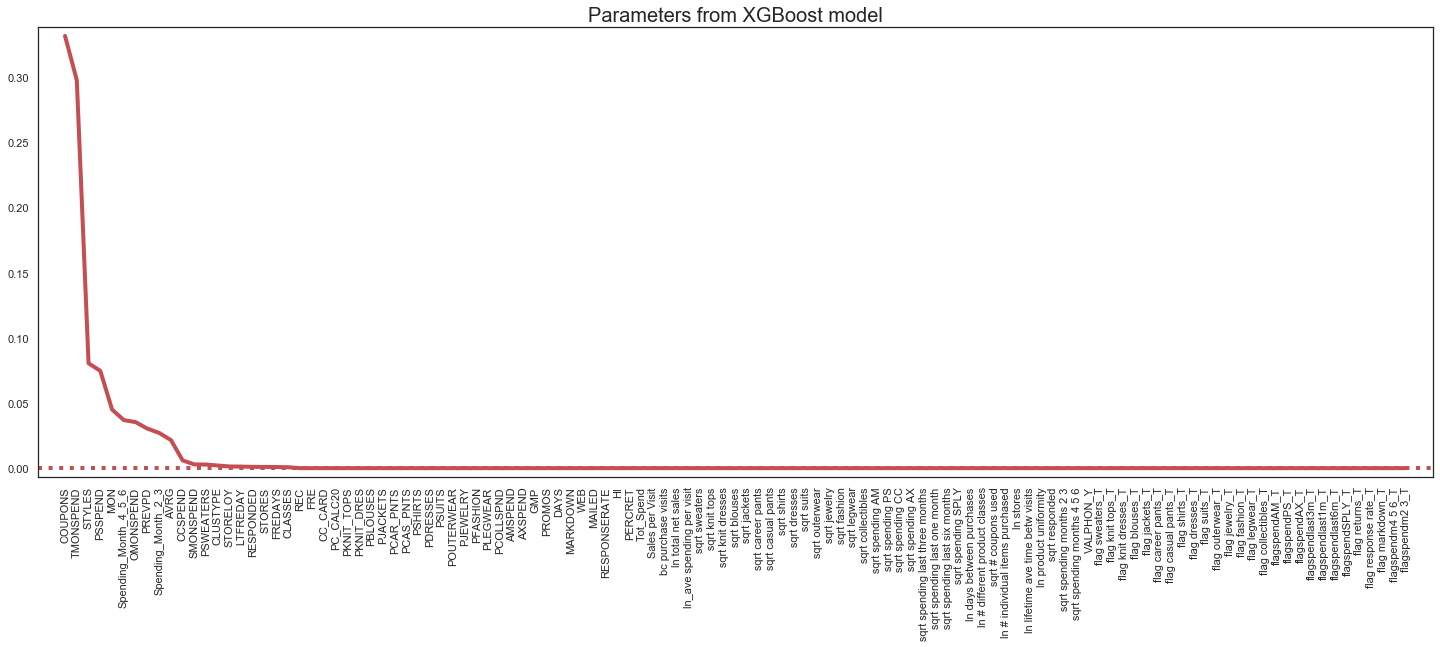

In [903]:
plt.plot(g4.features, g4.weight)
plt.xticks(range(len(g4.features)), g4.features, rotation=90) 
plt.margins(0.02)
plt.axhline(y=0, color='r', linestyle=':')
plt.title("Parameters from XGBoost model", fontsize=20)
plt.show()

In [ ]:
#####################################################################################################################

### For second model, I again used  GridSearchCV to to optimize the hyperparameter as below. For the best_params_, I found learning_rate': 0.03, 'max_depth': 5,  'min_child_weight': 2, 'reg_lambda': 0.01. reg_lambda option is for L2 regularization. These optimum set of hyperparameters are then used to run the XGBoost model. From that I found best score is 0.79. R-squared and adjusted r-squared of training set is 0.98 whereas in test set the r-square is 0.98. Mean absolute error of this model is 25.6. 

In [944]:
xgb1 = XGBRegressor()
parameters = { #when use hyperthread, xgboost may become slower
              'reg_lambda':[0.001,0.01,0.05, 0.1, 0.5, 1],
              
              'learning_rate': [0.001,0.01,.03], #so called `eta` value
              'max_depth': [5, 6, 7, 8],
              'min_child_weight': [2,3,4]}
              

In [945]:
from xgboost.sklearn import XGBRegressor
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    8.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   43.7s
[Parallel(n_jobs=5)]: Done 432 out of 432 | elapsed:  1.8min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={

In [946]:
xgb_grid.best_params_

{'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 2,
 'reg_lambda': 0.01}

In [921]:

from sklearn.metrics import accuracy_score, r2_score
print('Best score: ', xgb_grid.best_score_)

best = xgb_grid.best_estimator_
print('R2: ', r2_score(y_pred = best.predict(X_train), y_true = y_train))
print('R2: ', r2_score(y_pred = best.predict(X_test), y_true = y_test))

Best score:  0.7915223316325137
R2:  0.981270972607908
R2:  0.9815293269940651


In [947]:
best = xgb_grid.best_estimator_
a= r2_score(y_pred = best.predict(X_train), y_true = y_train)


In [948]:
adj_r2 = (1 - (1 - a) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted R-squared of the linear regression is", adj_r2)


Adjusted R-squared of the linear regression is 0.9799495995096928


In [949]:
from sklearn.metrics import mean_absolute_error
y_pred = best.predict(X_train)
y_true = y_train
mean_absolute_error(y_true, y_pred)

25.62267924156932

In [922]:
xgb2 = XGBRegressor(learning_rate= 0.03, max_depth=5, min_child_weight= 2, reg_lambda= 0.01)

In [923]:
xgb2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.01, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [ ]:
best = xgb_grid.best_estimator_
a= r2_score(y_pred = best.predict(X_train), y_true = y_train)
adj_r2 = (1 - (1 - a) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted R-squared of the linear regression is", adj_r2)
from sklearn.metrics import mean_absolute_error
y_pred = best.predict(X_train)
y_true = y_train
mean_absolute_error(y_true, y_pred)

In [925]:
k5=xgb2.feature_importances_.ravel()
print(k5.shape)
g5=pd.DataFrame(col, k5)
g5.to_csv("an4.csv")

(115,)


In [926]:
g4=pd.read_csv("an4.csv")

### I plotted the parameters from the XGBoost model as below. The most correlated variables to maximize the profit are CCSPEND, CLASSES, MON.

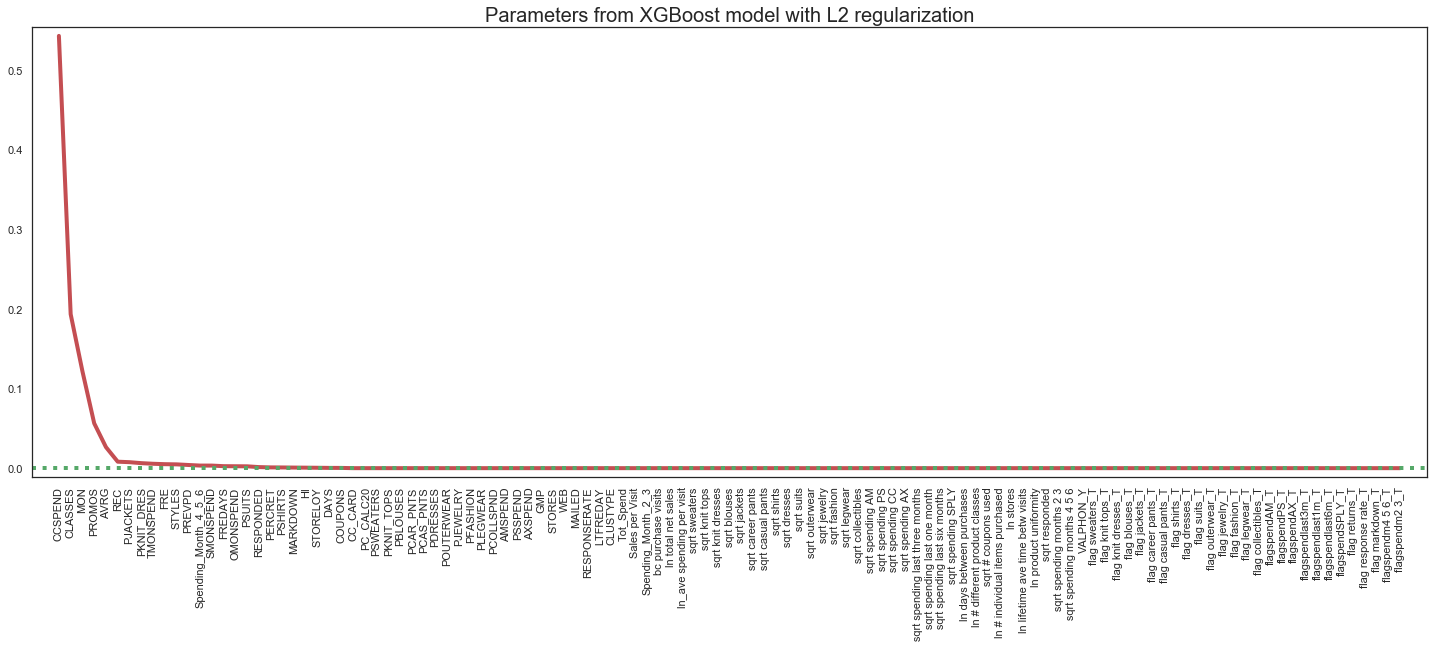

In [929]:
plt.plot(g4.features, g4.weight)
plt.xticks(range(len(g4.features)), g4.features, rotation=90) 
plt.margins(0.02)
plt.axhline(y=0, color='g', linestyle=':')
plt.title("Parameters from XGBoost model with L2 regularization", fontsize=20)
plt.show()

## CONCLUSION

###  The task was to develop a model that would identify customers who will respond to a direct-mail marketing promotion and maximize profits. The data was of clothing from clothing store chain in New England with 2847 records and 119 variables. The issue was not only that the data has 119 variables with many categorical ones , the variables seems divided into two groups i.e., original and derived one(description of derived variables was not available). Therefore multicollinearity was a big issue too. To handle this, the option of variable selection came to rescue. As after initial cleaning steps, the data was divided into training and test. As objective was to identify customers who respond to direct mail marketing, LogisticRegaression with variable selection seems best choice. For variable selection, I compared LASSO, Ridge, ElasticNet. In this Elastic Net performed the best, as it reduced 80 variables to 0, has lowest MSE and highest accuracy. Variables "ln lifetime average time between visits" variable in all the analysis found inversely related with RESP which suggests that when the lifetime average is smaller the chance of Responding is high. However in the elastic net, "DAYS",responserate, "bc purchase visits", "sqrt blouses" are found directly related with RESP.

### Second task was to come up with a model to maximize profit. The absence of the labels of the variable names leaves many variable not clearly defined. However, log of total spending provided in the dataset was my choice for target variable which as per my understanding reflects the profit and also log transformed. GridSearchCV is used to identify the hyperparameters for l1 and l2 penality for XGBoost regression models. Both the models(with penality l1 and l2) are comparable. For first with l1 penality model, R-squared and adjusted r-squared of training set is 0.95 whereas in test set the r-square is 0.84. Mean absolute error of this model is 22. Second with l2 penality model, R-squared and adjusted r-squared of training set is 0.98 whereas in test set the r-square is 0.98. Mean absolute error of this model is 25.6. The most correlated variables to maximize the profit are COUPONS, TMONSPEND, STYLES, PSSPEND, MON from first model, whereas CCSPEND, CLASSES, MON in the second model.
